In [257]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 1 Read Traning Data

## 1.1 Read X

In [29]:
df_Xt = pd.read_csv('data/trainData.csv', header=None)
del df_Xt[0]
df_Xt['3001'] = 1

In [45]:
df_Xt.describe()

,1,2,3,4,5,6,7,8,9,10,...,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,0.000117,0.000592,0.000358,0.000778,0.002907,0.002169,0.000371,0.000711,0.000423,0.003197,...,0.000837,0.001868,0.002873,0.000988,0.005224,0.004936,0.000440,0.000591,0.000395,1.0
std,0.004773,0.010521,0.009350,0.012686,0.023443,0.020401,0.008833,0.011637,0.009116,0.025986,...,0.012444,0.018735,0.024009,0.014105,0.034376,0.031370,0.009485,0.011273,0.008894,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,0.209000,0.250000,0.378000,0.267000,0.267000,0.256000,0.267000,0.243000,0.243000,0.365000,...,0.236000,0.243000,0.302000,0.267000,0.474000,0.348000,0.258000,0.267000,0.250000,1.0


In [46]:
df_Xt

,1,2,3,4,5,6,7,8,9,10,...,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001
0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [47]:
Xt = df_Xt.values
Xt.shape

(5000, 3001)

In [48]:
X = Xt.transpose()
X.shape

(3001, 5000)

## 1.2 Read y

In [39]:
df_y = pd.read_csv('data/trainLabels.csv', header=None)
del df_y[0]

In [40]:
df_y.describe()

,1
count,5000.000000
mean,87.910800
std,3.393928
min,80.000000
25%,85.000000
50%,88.000000
75%,90.000000
max,99.000000


In [41]:
df_y

,1
0,85
1,92
2,86
3,87
4,88
5,93
6,90
7,92
8,87
9,84


In [43]:
y = df_y.values
y.shape

(5000, 1)

## 1.3 Summary

In [117]:
df_Xt = pd.read_csv('data/trainData.csv', header=None)
df_Xt[str(len(df_Xt.columns))] = 1
del df_Xt[0]
Xt = df_Xt.values
X = Xt.transpose()

df_y = pd.read_csv('data/trainLabels.csv', header=None)
del df_y[0]
y = df_y.values

# 2 Data Cleaning etc

# 3 Model - Ridge Algorithm

In [215]:
lambdaa = .1  # default \lambda

In [216]:
dimension = X.shape[0]

In [217]:
I = np.zeros((dimension, dimension))
for i in range(dimension):
    I[i, i] = 1

In [218]:
I*lambdaa

array([[ 0.1,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0.1,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.1, ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0.1,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.1,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0.1]])

In [219]:
%time w_bar = np.linalg.inv(X@Xt + lambdaa*I) @ X @ y   # training the parameters

CPU times: user 9.78 s, sys: 465 ms, total: 10.2 s
Wall time: 3.62 s


In [220]:
w_bar.shape

(3001, 1)

In [221]:
w_bar

array([[  1.37033299],
       [  4.06053774],
       [  1.9151613 ],
       ..., 
       [ -1.11249553],
       [  2.09171501],
       [ 81.7300503 ]])

In [222]:
w = w_bar[0:dimension-1]
w.shape

(3000, 1)

In [223]:
b = w_bar[dimension-1]  # bias
b[0]

81.730050297395024

# 4 Predict

In [224]:
df_Xt = pd.read_csv('data/valData.csv', header=None)
del df_Xt[0]
df_Xt['3001'] = 1  # TODO: change to len()
Xt = df_Xt.values
X = Xt.transpose()

df_y = pd.read_csv('data/valLabels.csv', header=None)
del df_y[0]
y = df_y.values

In [225]:
Xt.shape

(5000, 3001)

In [226]:
w_bar.shape

(3001, 1)

In [227]:
pred = Xt @ w_bar
pred

array([[ 88.72282297],
       [ 89.37157627],
       [ 84.23986104],
       ..., 
       [ 89.97981095],
       [ 84.21474391],
       [ 93.35687387]])

In [228]:
y

array([[88],
       [91],
       [84],
       ..., 
       [90],
       [87],
       [93]])

In [229]:
def rmse(true, pred):
    '''Comupte the root mean squared error (RMSE)
    Parameter:
        true (np.ndarray, n = 1): ground truth
        pred (np.ndarray, n = 1): prediction
    '''
    return math.sqrt(mean_squared_error(true, pred))

In [230]:
rmse(y, pred)

2.1557423907511657

In [144]:
np.linalg.norm(w)

143.89043331579097

In [155]:
def mynorm(w):
    summation = 0
    for i in w:
        summation += i**2
    return math.sqrt(summation)

print(mynorm(w))

143.89043331579123


In [156]:
%time np.linalg.norm(w)
%time mynorm(w)

CPU times: user 50 µs, sys: 12 µs, total: 62 µs
Wall time: 65.8 µs
CPU times: user 7.65 ms, sys: 84 µs, total: 7.73 ms
Wall time: 7.74 ms


143.89043331579123

In [174]:
w_bar

array([[  1.37033295],
       [  4.06053774],
       [  1.9151613 ],
       ..., 
       [ -1.11249553],
       [  2.09171501],
       [ 81.7300503 ]])

In [160]:
w_bar.transpose()

array([[  1.37033295,   4.06053774,   1.9151613 , ...,  -1.11249553,
          2.09171501,  81.7300503 ]])

In [162]:
X.shape

(3001, 5000)

In [172]:
xi = X[:, 1]
xi

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

In [173]:
xi.transpose()

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

---

---

# 5 Put Everything in a Class

In [291]:
class RidgeRegression:
    '''Caitao's implementation of Ridge Regression
    Attributes:
        w_bar (np.ndarray): w_bar = [w;1], shape=(k+1, 1)
    '''
    def __init__(self):
        self.w_bar = np.zeros(0)

        
    def read_X(self, filename):
        '''Read the feature data, and make it into desired shape
        Parameters:
            filename (str)
        Return:
            X  (np.ndarray): shape=(k+1, n)
        '''
        df_Xt = pd.read_csv(filename, header=None)
        df_Xt[str(len(df_Xt.columns))] = 1     # add one to each x_i
        del df_Xt[0]
        Xt = df_Xt.values
        X = Xt.transpose()
        return X
    
    
    def read_y(self, filename):
        '''Read the label data, and make it into desired shape
        Parameters:
            filename (str)
        Return:
            y  (np.ndarray): shape=(n, 1)
        '''
        df_y = pd.read_csv(filename, header=None)
        del df_y[0]
        return df_y.values
    
    
    def ridgeReg(self, X, y, lambdaa):
        '''This version of ridge regression is used to implement the signature in question 3.1
        Parameters:
            X (np.ndarray):  feature data, shape=(k+1, n)
            y (np.ndarray):  label data, shape=(n, 1)
            lambdaa (float): the hyperparameter of ridge regression
        Return:
            w (np.ndarray):      trained weights, shape=(k, 1)
            b (float):           bias
            obj (float):         the value of the objective function
            cvErrs (np.ndarray): LOOCV errors, shape=(n, 1)
        '''
        dimension  = X.shape[0]
        num_sample = X.shape[1]
        
        I = np.zeros((dimension, dimension))
        for i in range(dimension):
            I[i, i] = 1
        
        Xt = X.transpose()
        C_in = np.linalg.inv(X@Xt + lambdaa*I)  # C^{-1} in the homework 2
        self.w_bar = C_in @ X @ y  # train the parameters
        
        w = self.w_bar[0:dimension-1]
        b = self.w_bar[dimension-1]
        pred = Xt @ self.w_bar
        obj = lambdaa*np.linalg.norm(w)**2 + np.linalg.norm(pred-y)**2
        loocv = []
        for i in range(num_sample):
            xi = X[:, i]
            error = (self.w_bar.transpose() @ xi - y[i]) / (1 - xi.transpose() @ C_in @ xi)
            loocv.append(error)
        
        return w, b, obj, np.array(loocv)
    
    
    def question3_2_1(self, lambdaas):
        '''Generate plotting data for question 3.2.1
        '''
        training_file = open('plot_data/training.csv', 'w')
        validation_file = open('plot_data/validation.csv', 'w')
        loocv_file = open('plot_data/loocv.csv', 'w')
        
        X = self.read_X('data/trainData.csv')
        y = self.read_y('data/trainLabels.csv')
        Xt = X.transpose()

        X_val = self.read_X('data/valData.csv')
        y_val = self.read_y('data/valLabels.csv')
        Xt_val = X_val.transpose()

        dimension  = X.shape[0]
        num_sample = X.shape[1]
        
        I = np.zeros((dimension, dimension))
        for i in range(dimension):
            I[i, i] = 1
        
        for lambdaa in lambdaas:
            print(lambdaa)
            C_in = np.linalg.inv(X@Xt + lambdaa*I)  # C^{-1} in the homework 2
            self.w_bar = C_in @ X @ y               # train the parameters
            
            pred_training = Xt @ self.w_bar
            pred_validation = Xt_val @ self.w_bar
            
            loocv = []
            for i in range(num_sample):
                xi = X[:, i]
                error = (self.w_bar.transpose() @ xi - y[i]) / (1 - xi.transpose() @ C_in @ xi)
                loocv.append(error)
            
            rmse_training = self.rmse(y, pred_training)
            rmse_validation = self.rmse(y_val, pred_validation)
            
            summation = 0.
            for i in loocv:
                summation += i**2
            rmse_loocv = math.sqrt(summation/len(loocv))
            
            print(lambdaa, ',', rmse_training, file=training_file)
            print(lambdaa, ',', rmse_validation, file=validation_file)
            print(lambdaa, ',', rmse_loocv, file=loocv_file)

        
    def fit(self, X, y, lambdaa):
        '''Fit the data. Ttargeted at question 3.2.4
        Parameters:
            X (np.ndarray):  feature data, shape=(k+1, n)
            y (np.ndarray):  label data, shape=(n, 1)
            lambdaa (float): the hyperparameter of ridge regression
        '''
        dimension  = X.shape[0]
        num_sample = X.shape[1]
        
        I = np.zeros((dimension, dimension))
        for i in range(dimension):
            I[i, i] = 1
        
        Xt = X.transpose()
        self.w_bar = np.linalg.inv(X@Xt + lambdaa*I) @ X @ y  # train the parameters
        
    
    def predict(self, X):
        '''Predict by using the trained self.w_bar
        Parameters:
            X (np.ndarray): shape=(k+1, n)
        Return:
            y (np.ndarray): shape=(n, 1)
        '''
        Xt = X.transpose()
        return Xt @ self.w_bar
    
    
    def rmse(self, true, pred):
        '''Comupte the root mean squared error (RMSE)
        Parameter:
            true (np.ndarray, n = 1): ground truth
            pred (np.ndarray, n = 1): prediction
        Return:
            rmse (float)
        '''
        return math.sqrt(mean_squared_error(true, pred))

## 5.1 Question 3.1

In [237]:
myridge = RidgeRegression()

In [238]:
X = myridge.read_X('data/trainData.csv')
y = myridge.read_y('data/trainLabels.csv')

In [239]:
w, b, obj, loocv = myridge.ridgeReg(X, y, 0.1)

In [240]:
w

array([[ 1.37033295],
       [ 4.06053774],
       [ 1.9151613 ],
       ..., 
       [-1.58682263],
       [-1.11249553],
       [ 2.09171501]])

In [241]:
b

array([ 81.7300503])

In [242]:
obj

9548.5628465724549

In [243]:
loocv

array([[ 0.29432497],
       [-2.01404769],
       [-0.78250402],
       ..., 
       [-2.63761447],
       [-4.41226933],
       [-0.83754576]])

## 5.2 Question 3.2.1

In [234]:
myridge = RidgeRegression()

In [236]:
myridge.question3_2_1([0.01, 0.1, 1, 10, 100, 1000])

0.01
0.1
1
10
100
1000


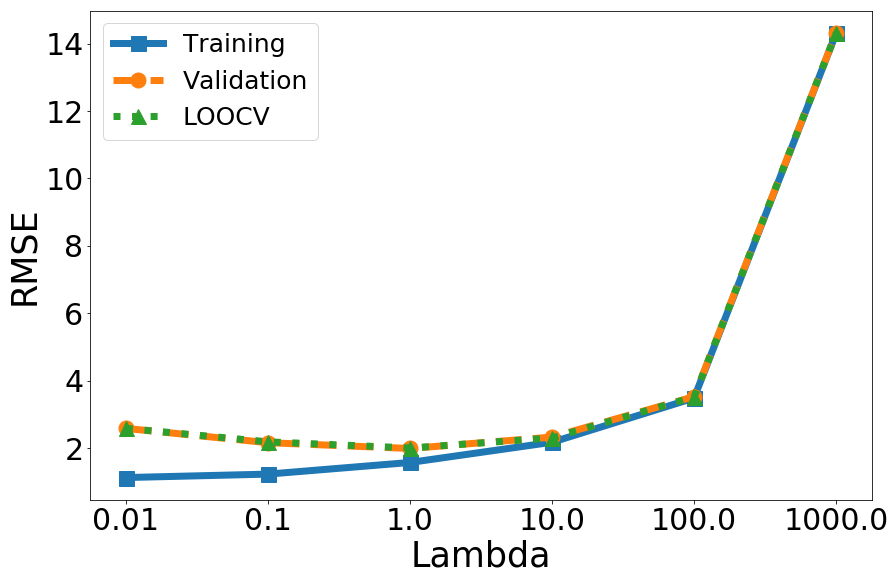

In [281]:
plt.figure(figsize=(14, 9))
rcParams['lines.linewidth'] = 7

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 30
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_train = pd.read_csv('plot_data/training.csv', header=None)
df_val   = pd.read_csv('plot_data/validation.csv', header=None)
df_loocv = pd.read_csv('plot_data/loocv.csv', header=None)

Y_train = df_train[1].tolist()
Y_val =   df_val[1].tolist()
Y_loocv = df_loocv[1].tolist()

X_float = df_train[0].tolist()
X = []
my_xticks = []
i = 0
for x in X_float:
    X.append(i)
    my_xticks.append(str(x))
    i += 1

plt.plot(X, Y_train, linestyle='-', marker='s', markersize=15)
plt.plot(X, Y_val, linestyle='--', marker='o', markersize=15)
plt.plot(X, Y_loocv, linestyle=':', marker='^', markersize=15)

plt.xticks(X, my_xticks)

plt.legend(['Training', 'Validation', 'LOOCV'], prop={'size':25})
plt.xlabel('Lambda', fontsize=35)
plt.ylabel('RMSE', fontsize=35)

plt.savefig('plot/lambda1.pdf')
plt.show()

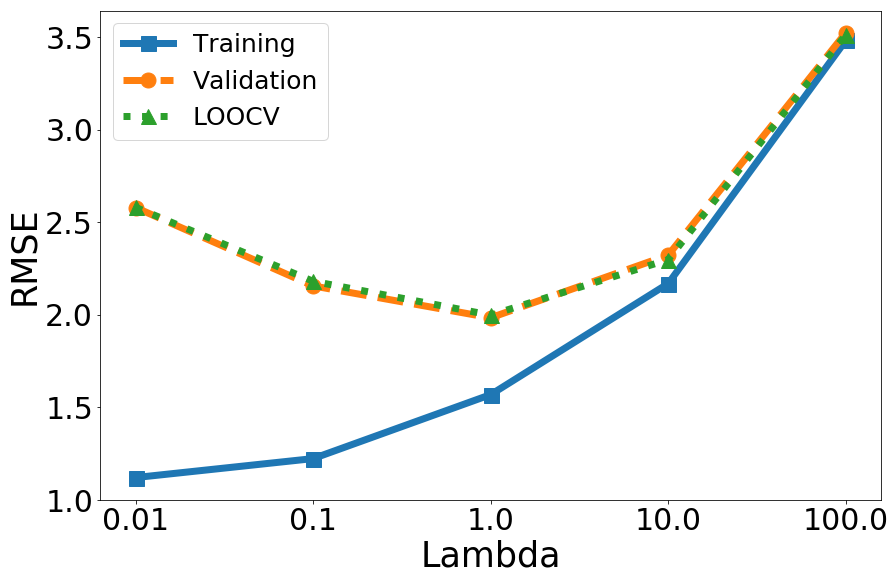

In [280]:
plt.figure(figsize=(14, 9))
rcParams['lines.linewidth'] = 7

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 30
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_train = pd.read_csv('plot_data/training.csv', header=None)
df_val   = pd.read_csv('plot_data/validation.csv', header=None)
df_loocv = pd.read_csv('plot_data/loocv.csv', header=None)

df_train.drop(df_train.index[-1], inplace=True)
df_val.drop(df_val.index[-1], inplace=True)
df_loocv.drop(df_loocv.index[-1], inplace=True)

Y_train = df_train[1].tolist()
Y_val =   df_val[1].tolist()
Y_loocv = df_loocv[1].tolist()

X_float = df_train[0].tolist()
X = []
my_xticks = []
i = 0
for x in X_float:
    X.append(i)
    my_xticks.append(str(x))
    i += 1

plt.plot(X, Y_train, linestyle='-', marker='s', markersize=15)
plt.plot(X, Y_val, linestyle='--', marker='o', markersize=15)
plt.plot(X, Y_loocv, linestyle=':', marker='^', markersize=15)

plt.xticks(X, my_xticks)

plt.legend(['Training', 'Validation', 'LOOCV'], prop={'size':25})
plt.xlabel('Lambda', fontsize=35)
plt.ylabel('RMSE', fontsize=35)

plt.savefig('plot/lambda2.pdf')
plt.show()

## Question 3.2.4

In [293]:
myridge = RidgeRegression()
X = myridge.read_X('data/trainData.csv')
y = myridge.read_y('data/trainLabels.csv')
X_val = myridge.read_X('data/valData.csv')
y_val = myridge.read_y('data/valLabels.csv')

In [296]:
lambdaas = np.linspace(0.4, 1.0, 7)
lambdaas

array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [297]:
for lambdaa in lambdaas:
    myridge.fit(X, y, lambdaa)
    y_pred = myridge.predict(X_val)
    print(lambdaa, myridge.rmse(y_val, y_pred))

0.4 1.9915695142948324
0.5 1.981837920310319
0.6 1.977626668461918
0.7 1.9766847176359068
0.8 1.977793899271355
0.9 1.9802415379344853
1.0 1.9835860902517568


In [298]:
myridge.fit(X, y, 0.7)

X_test = myridge.read_X('data/testData.csv')
y_pred = myridge.predict(X_test)

In [321]:
df_pred = pd.DataFrame(y_pred, columns=['Prediction'])

In [323]:
index = [i for i in range(0, len(df_pred))]
df_pred.insert(0, 'Id', index)

In [325]:
df_pred

,Id,Prediction
0,0,88.635859
1,1,87.650152
2,2,89.186940
3,3,85.928151
4,4,92.792333
5,5,87.401028
6,6,92.311585
7,7,88.436870
8,8,86.333269
9,9,88.103912


In [326]:
df_pred.to_csv('data/predTestLabels.csv ', header=True, index=False)